In [52]:
import pandas as pd

In [53]:
df=pd.read_csv('Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [54]:
df.columns=["Date","Production"]

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df["Production"]=mms.fit_transform(df["Production"].values.reshape(-1,1))

In [56]:
df.head()

,Date,Production
0,1/1/1985,0.232017
1,2/1/1985,0.207274
2,3/1/1985,0.096304
3,4/1/1985,0.029104
4,5/1/1985,0.000000


In [57]:
Date=pd.to_datetime(df["Date"],format="%m/%d/%Y")
Date.head()

,Date
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01


In [58]:
Date_seconds=Date.astype(int)//10**9 # to convert nano seconds back to seconds

In [59]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
Date_seconds=MMS.fit_transform(Date_seconds.values.reshape(-1,1))

In [60]:
df["Date"]=Date_seconds

In [61]:
print("Nulls\n",df.isna().sum())

Nulls
 Date          0
Production    0
dtype: int64


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["Date"],df["Production"],test_size=0.3)

In [63]:
print("total length of data --> ", len(df))
print("Train length --> ", X_train.count())
print("Test length --> ", X_test.count())

total length of data -->  397
Train length -->  277
Test length -->  120


In [64]:
print("X train ->",X_train.shape)
print("Y_train ->",y_train.shape)

X train -> (277,)
Y_train -> (277,)


In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM,Dropout,RepeatVector

In [66]:
#X_train.shape[1],1
#acutal shape=(277,)
X_train=np.reshape(X_train, (X_train.shape[0], 1))
X_test=np.reshape(X_test,(X_test.shape[0],1))
X_train.shape

(277, 1)

In [67]:
model = Sequential([
    SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[0],1)),
    Dropout(0.2),
    SimpleRNN(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_13 (SimpleRNN)            │ (None, 277, 50)             │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 277, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=5)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1164
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155
Epoch 9/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212
Epoch 10/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213
Epoch 11/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 12/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196
Epoch 13/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205
Epoch 14/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0194
Epoch 15/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170
Epoch 16/30
56/56 ━

In [70]:
predictions = model.predict(X_train)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [71]:
predictions

array([[0.27114472],
       [0.5843779 ],
       [0.6651431 ],
       [0.4634201 ],
       [0.22026142],
       [0.3905258 ],
       [0.4269619 ],
       [0.5968862 ],
       [0.77828324],
       [0.31581438],
       [0.7372264 ],
       [0.20745715],
       [0.38572514],
       [0.68210953],
       [0.570308  ],
       [0.6759362 ],
       [0.6573788 ],
       [0.6589527 ],
       [0.3093817 ],
       [0.7265978 ],
       [0.40956077],
       [0.6015459 ],
       [0.38734284],
       [0.58904517],
       [0.55786145],
       [0.6156098 ],
       [0.54060215],
       [0.78285205],
       [0.6481814 ],
       [0.27433562],
       [0.37304035],
       [0.24248222],
       [0.5953494 ],
       [0.4158147 ],
       [0.5687661 ],
       [0.19794858],
       [0.45230016],
       [0.4506885 ],
       [0.49651355],
       [0.311003  ],
       [0.7540282 ],
       [0.72815335],
       [0.3714216 ],
       [0.48858583],
       [0.30619127],
       [0.6171935 ],
       [0.37935746],
       [0.546

In [79]:
prediction=mms.inverse_transform(predictions)
actual=mms.inverse_transform(y_train.values.reshape(-1,1))

In [82]:
prediction

array([[ 75.40413 ],
       [ 98.61148 ],
       [104.59535 ],
       [ 89.64976 ],
       [ 71.6342  ],
       [ 84.24904 ],
       [ 86.94858 ],
       [ 99.53822 ],
       [112.97787 ],
       [ 78.71369 ],
       [109.93599 ],
       [ 70.68554 ],
       [ 83.89336 ],
       [105.852394],
       [ 97.56905 ],
       [105.39501 ],
       [104.020096],
       [104.13671 ],
       [ 78.2371  ],
       [109.14851 ],
       [ 85.65933 ],
       [ 99.88345 ],
       [ 84.013214],
       [ 98.957275],
       [ 96.64689 ],
       [100.92545 ],
       [ 95.36816 ],
       [113.316376],
       [103.33867 ],
       [ 75.64054 ],
       [ 82.953545],
       [ 73.28053 ],
       [ 99.42436 ],
       [ 86.12269 ],
       [ 97.45481 ],
       [ 69.98105 ],
       [ 88.82588 ],
       [ 88.706474],
       [ 92.10165 ],
       [ 78.357216],
       [111.180824],
       [109.26376 ],
       [ 82.83361 ],
       [ 91.514275],
       [ 78.000725],
       [101.042786],
       [ 83.42158 ],
       [ 95.8

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.013805877288611355
Mean Absolute Error (MAE): 0.09766723160013083


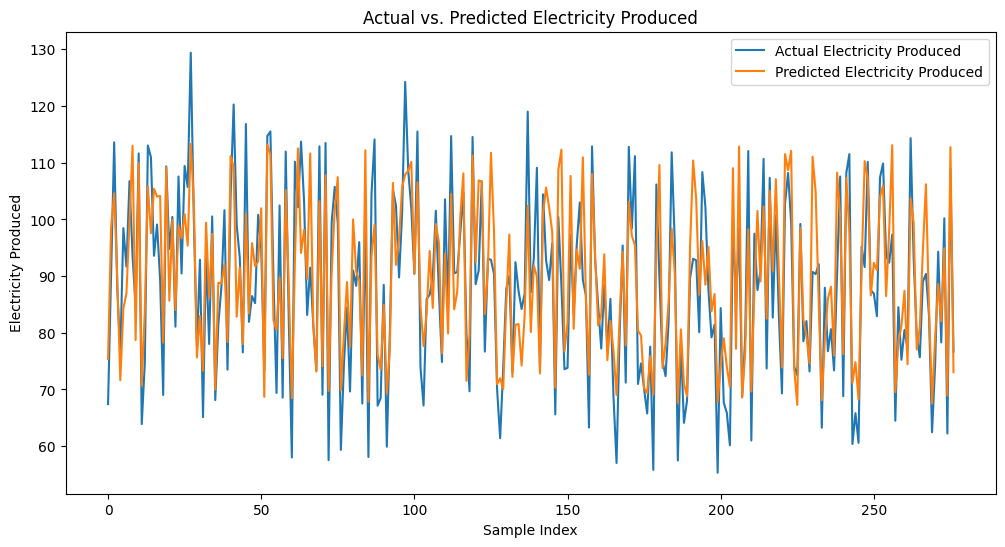

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = model.predict(X_train)

mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Electricity Produced')
plt.plot(prediction, label='Predicted Electricity Produced')
plt.title('Actual vs. Predicted Electricity Produced')
plt.xlabel('Sample Index')
plt.ylabel('Electricity Produced')
plt.legend()
plt.show()
